<a href="https://colab.research.google.com/github/gutiel2/Machine-Learning-Engineering/blob/main/MLE_HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mounted at /content/drive


<ipython-input-5-dbbe28dda7cb>:7: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(image)
<ipython-input-5-dbbe28dda7cb>:8: FutureWarning: `show` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.show()


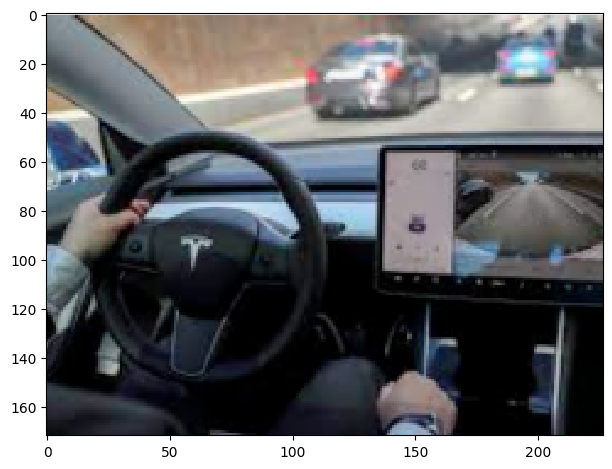

In [5]:
# Question 1 - Pulling the image

import skimage.io as io
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
file_path = '/content/drive/My Drive/ColabNotebooks/' + 'mlehw3.png'

image = io.imread(file_path)
io.imshow(image)
io.show()


In [31]:
# Initilizaing K-Means Model
from sklearn.cluster import KMeans

skmodel = KMeans(
    n_clusters=5,
    init='k-means++',
    n_init='auto',
    max_iter=300,
    tol=0.0001,
    verbose=0,
    random_state=None,
    copy_x=True,
    algorithm='lloyd',
)

x_train = image[:,:,:3].reshape(-1, 3)
skmodel.fit(x_train)

KMeans(n_clusters=5)

[3 3 3 ... 0 0 0]


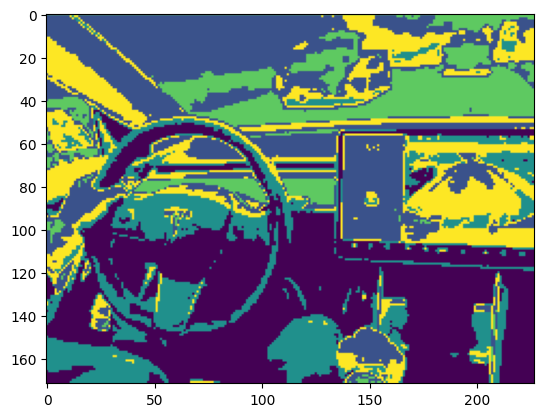

In [32]:
import matplotlib.pyplot as plt
labels = skmodel.labels_
centers = skmodel.cluster_centers_

labeled_image = labels.reshape(image.shape[:2])  # Assuming image is 3D (height, width, channels)

# Display the labeled image
plt.imshow(labeled_image)
plt.show()

Text(0, 0.5, 'Price in $10,000s')

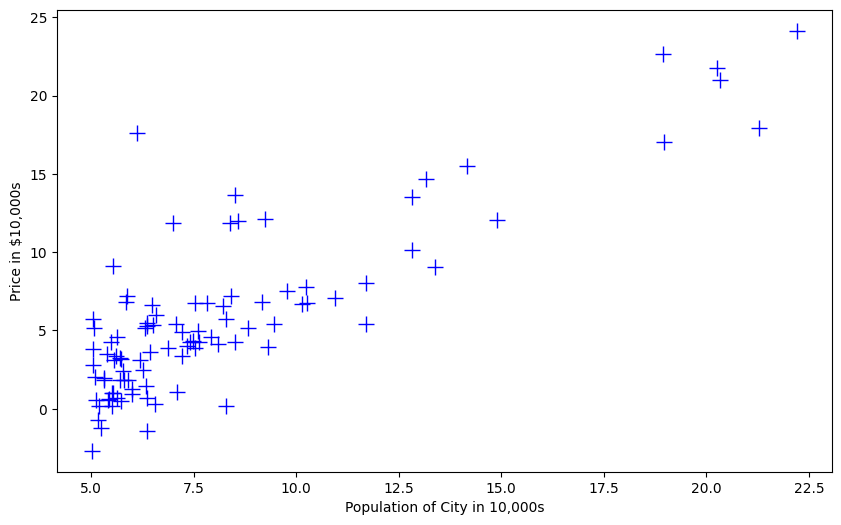

In [58]:
# Question 2 - Implementing Linear ML Model

# Imports
file_path = '/content/drive/My Drive/ColabNotebooks/' + 'housing_prices.txt'
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D
from matplotlib import cm
import itertools

# Checking if imported data matches the plot
datafile = file_path
cols = np.loadtxt(datafile,delimiter=',',usecols=(0,1),unpack=True)
X = np.transpose(np.array(cols[:-1]))
y = np.transpose(np.array(cols[-1:]))
m = y.size
X = np.insert(X,0,1,axis=1)

plt.figure(figsize=(10,6))
plt.plot(X[:,1],y[:,0],'b+',markersize=12)
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Price in $10,000s')


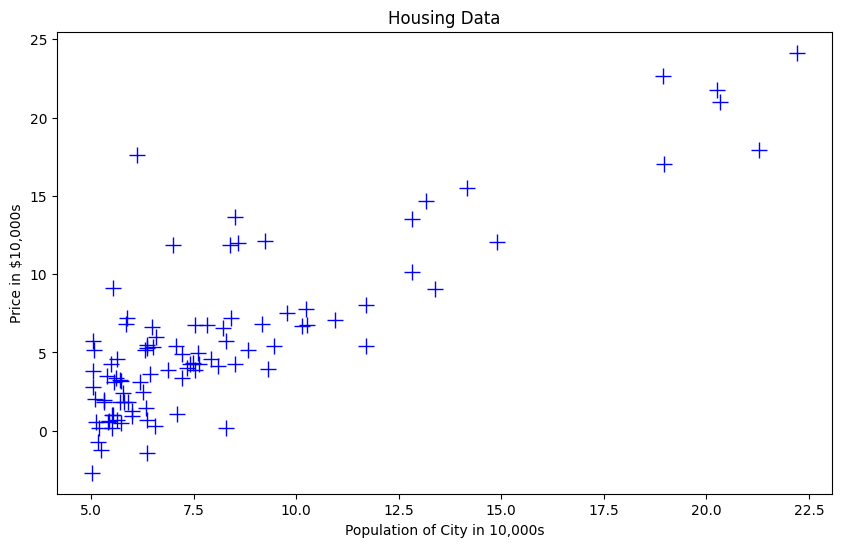

Batch Size 1: Final weights = [-3.96916133  1.0696801 ], Final cost (last mini-batch) = 0.0512
Batch Size 5: Final weights = [-3.9354233   1.34506229], Final cost (last mini-batch) = 7.5421
Batch Size 10: Final weights = [-3.85147101  1.2508831 ], Final cost (last mini-batch) = 3.3536
Batch Size 20: Final weights = [-3.46936078  1.22105832], Final cost (last mini-batch) = 10.5747


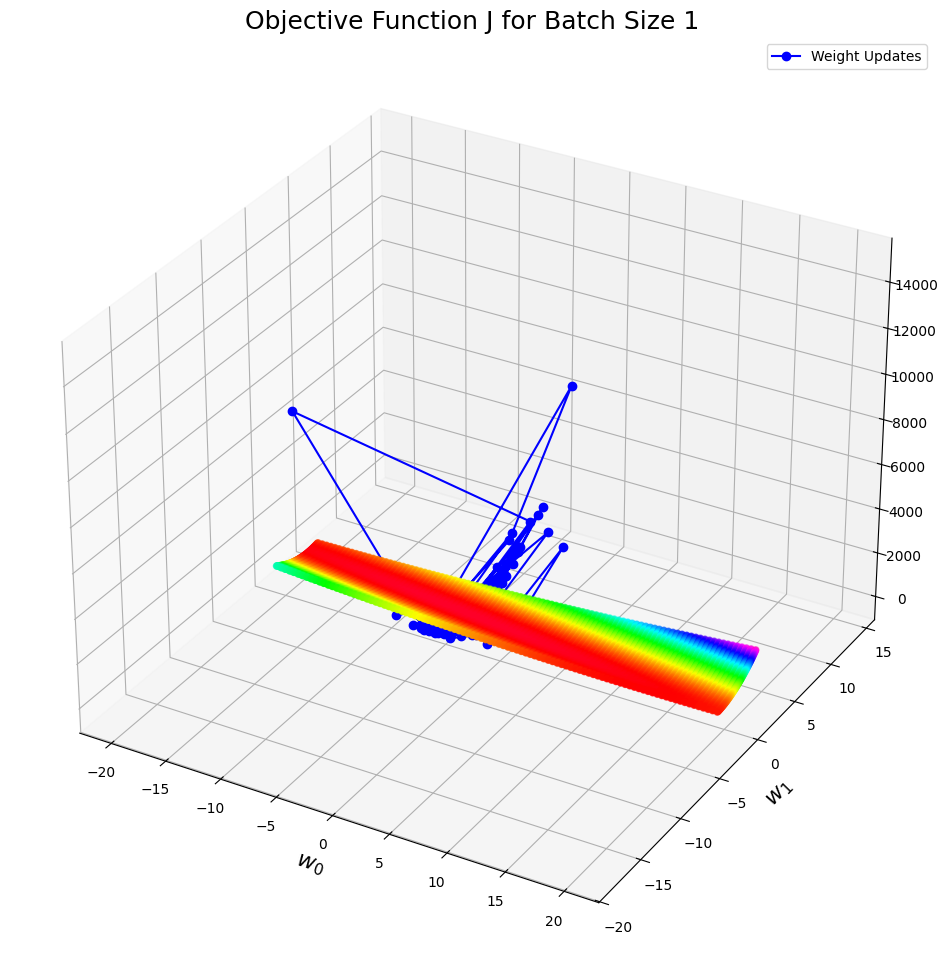

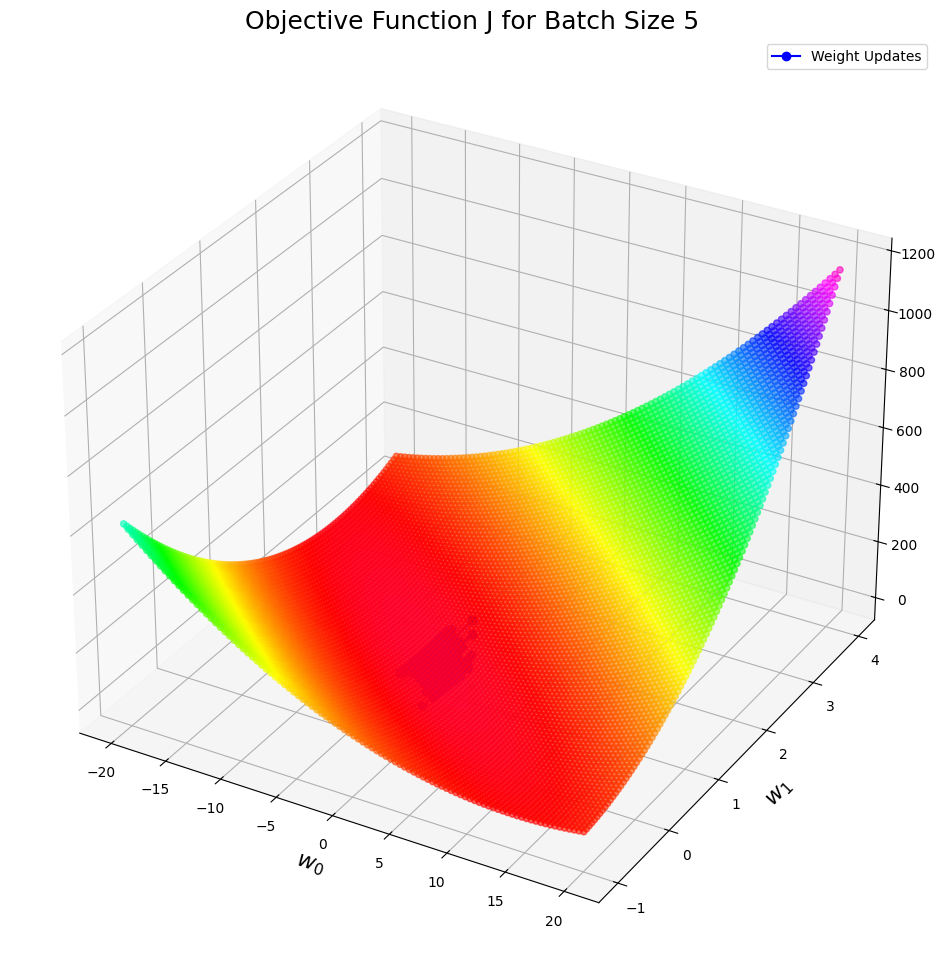

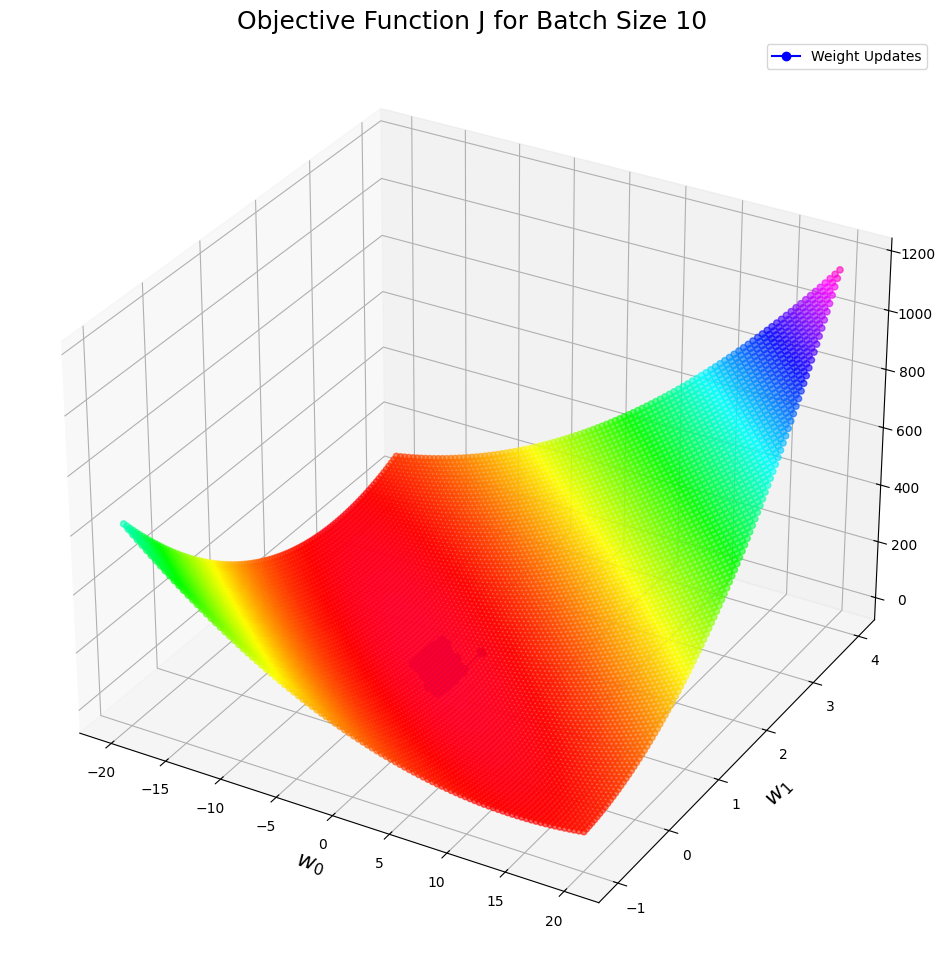

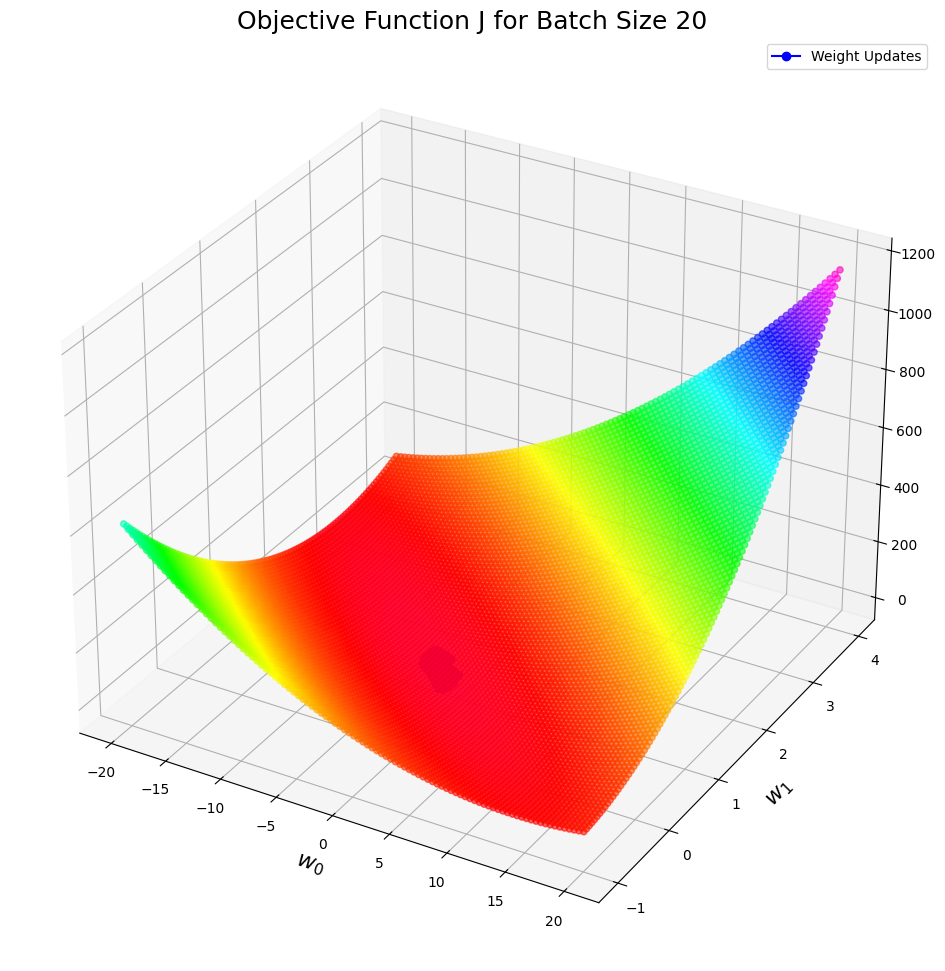

In [75]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# Loading Data
file_path = '/content/drive/My Drive/ColabNotebooks/housing_prices.txt'
cols = np.loadtxt(file_path, delimiter=',', usecols=(0,1), unpack=True)
X = np.transpose(np.array(cols[:-1]))
y = np.transpose(np.array(cols[-1:]))
m = y.size

# Insert intercept term (x0 = 1)
X = np.insert(X, 0, 1, axis=1)

# Quick plot of the data (population vs price)
plt.figure(figsize=(10,6))
plt.plot(X[:,1], y[:,0], 'b+', markersize=12)
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Price in $10,000s')
plt.title("Housing Data")
plt.show()

# Model hypothesis: h(w, X) = X * w
def h(w, X):
    return np.dot(X, w)

# Mean Squared Error
def mse(w, X, y):
    return float((1. / (2 * X.shape[0])) * np.sum((h(w, X) - y) ** 2))

# Mini-Batch Gradient Descent Function
def gradient_descent(X, y, w_start, iterations, alpha, batch_size):
    w = w_start.copy()
    J_values = []
    w_history = []
    num_samples = X.shape[0]

    # Loop over the number of full passes over the data (epochs)
    for it in range(iterations):
        # Optionally, shuffle the data at each iteration (epoch)
        indices = np.arange(num_samples)
        np.random.shuffle(indices)
        X_shuffled = X[indices]
        y_shuffled = y[indices]

        # Process mini-batches
        for i in range(0, num_samples, batch_size):
            X_batch = X_shuffled[i:i + batch_size]
            y_batch = y_shuffled[i:i + batch_size]

            # Compute predictions for the current mini-batch
            predictions = h(w, X_batch)
            errors = predictions - y_batch

            # Compute gradient: note that we sum over the mini-batch and average it.
            gradient = (1. / batch_size) * np.dot(X_batch.T, errors)

            # Update the weights
            w = w - alpha * gradient

            # Record cost on this mini-batch (optional: you can also record cost on entire training set)
            J_values.append(mse(w, X_batch, y_batch))
            w_history.append(w.copy())

    return w, w_history, J_values

# Settings for Gradient Descent
iterations = 250    # number of passes (epochs) over the data
alpha = 0.01        # learning rate
w_start = np.zeros((X.shape[1], 1))  # initial weights

# Try different batch sizes
batch_sizes = [1, 5, 10, 20]
results = {}  # to store final weights and cost history for each batch size

for b in batch_sizes:
    w_final, w_history, J_values = gradient_descent(X, y, w_start, iterations, alpha, b)
    results[b] = {'w': w_final, 'J': J_values, 'w_history': w_history}
    print(f"Batch Size {b}: Final weights = {w_final.ravel()}, Final cost (last mini-batch) = {J_values[-1]:.4f}")

# Define a grid over the parameter space for plotting J
w0_vals = np.linspace(-20, 20, 100)
w1_vals = np.linspace(-1, 4, 100)
W0, W1 = np.meshgrid(w0_vals, w1_vals)

# Compute the objective function J over the grid
J_vals = np.zeros(W0.shape)
for i in range(W0.shape[0]):
    for j in range(W0.shape[1]):
        w_temp = np.array([[W0[i, j]], [W1[i, j]]])
        J_vals[i, j] = mse(w_temp, X, y)

# Now, loop over each batch size to create a 3D plot of the objective function with weight updates
for b in [1, 5, 10, 20]:
    result = results[b]

    # Extract the weight history and compute the cost along the update path
    w_history = np.array(result['w_history']).reshape(-1, 2)
    J_history = np.array([mse(np.array([[w[0]], [w[1]]]), X, y) for w in w_history])

    # Create a 3D plot for this batch size
    fig = plt.figure(figsize=(12, 12))
    ax = fig.add_subplot(111, projection='3d')

    # Plot the objective function surface as a scatter plot
    scatter = ax.scatter(W0.flatten(), W1.flatten(),
                         J_vals.flatten(),
                         c=np.abs(J_vals.flatten()),
                         cmap=plt.get_cmap('gist_rainbow'),
                         alpha=0.6)

    # Overlay the weight update path
    ax.plot(w_history[:, 0], w_history[:, 1], J_history, 'bo-', label="Weight Updates")

    # Set axis labels and title
    ax.set_xlabel(r'$w_0$', fontsize=16)
    ax.set_ylabel(r'$w_1$', fontsize=16)
    ax.set_title(f'Objective Function J for Batch Size {b}', fontsize=18)
    ax.legend()
    plt.show()

In [108]:
# Question 3

# Imports
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Loading Data
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
feature_names = df.columns

print("Original Features:", feature_names)

X = df.drop('target', axis=1)
y = df['target']

# Splitting Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
lr = LogisticRegression(solver='lbfgs', max_iter=5000)
rfe = RFE(lr, n_features_to_select=2)
rfe = rfe.fit(X_train, y_train)
print('True/False Selection of features:', rfe.support_)
feature_indices = np.array([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29])
feature_indices = feature_indices[rfe.support_]
print('The best features are : ', np.array(data.feature_names)[rfe.support_])

Original Features: Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'],
      dtype='object')
True/False Selection of features: [False False False False False False False False False False False False
 False False False False False False False False False False False False
 False  True  True False False False]
The best features are :  ['worst compactness' 'worst concavity']


Accuracy: 0.8304093567251462
Precision: 0.8434782608695652
F1-Score: 0.8699551569506726
Confusion Matrix:
[[45 18]
 [11 97]]
Confusion Matrix Normalized:
[[0.71428571 0.28571429]
 [0.10185185 0.89814815]]


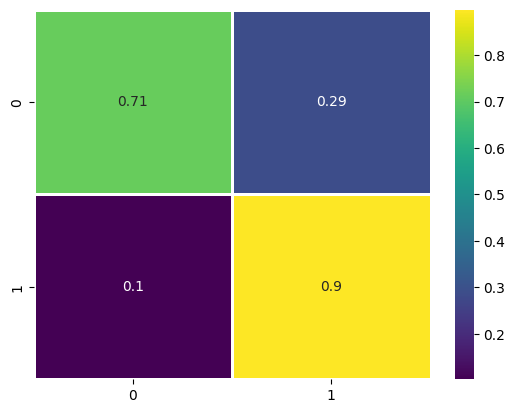

In [109]:
X_train_selected = X_train.iloc[:, rfe.support_]
X_test_selected = X_test.iloc[:, rfe.support_]
lr.fit(X_train_selected, y_train)

y_pred = lr.predict(X_test_selected)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

precision = precision_score(y_test, y_pred)
print("Precision:", precision)

f1 = f1_score(y_test, y_pred)
print("F1-Score:", f1)

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)
cm_sk = confusion_matrix(y_test, y_pred, normalize='true')
print("Confusion Matrix Normalized:")
print(cm_sk)

ax = sns.heatmap(cm_sk,linewidths=2, annot=True, cmap='viridis', cbar=True);

Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 117ms/step - loss: 5.4174 - mae: 1.2715 - val_loss: 3.6491 - val_mae: 1.1814
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 4.1409 - mae: 1.1326 - val_loss: 2.7812 - val_mae: 1.0835
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - loss: 2.8029 - mae: 1.0192 - val_loss: 2.3007 - val_mae: 1.0167
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 2.0789 - mae: 0.9011 - val_loss: 1.9409 - val_mae: 0.9599
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 1.9293 - mae: 0.8883 - val_loss: 1.6843 - val_mae: 0.9125
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 2.0012 - mae: 0.9023 - val_loss: 1.4735 - val_mae: 0.8729
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - loss: 1.5363 - mae: 0.8265 - val_loss: 1.0661 - val_mae: 0.7957
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 1.1615 - mae: 0.7757 - val_loss: 0.9736 - val_mae: 0.7697
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - loss: 1.0330 - mae: 0.7159 -

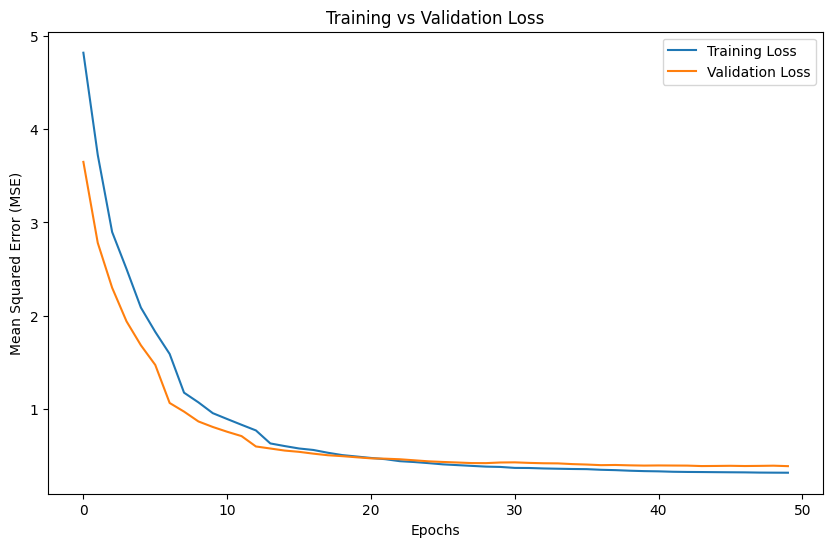

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
Predicted House Price for Population 165,000: $1431047.06


In [137]:
# Question 4 - Neural Network for House Price Prediction

import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Loading Data
file_path = '/content/drive/My Drive/ColabNotebooks/housing_prices.txt'
cols = np.loadtxt(file_path, delimiter=',', usecols=(0,1), unpack=True)
X = np.transpose(np.array(cols[:-1]))
y = np.transpose(np.array(cols[-1:]))

# Normalize data
X = (X - np.mean(X)) / np.std(X)
y = (y - np.mean(y)) / np.std(y)

# Splitting Data into 70% Training, 30% Testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Constructing the Neural Network
model = Sequential([
    Dense(2, activation='relu', input_shape=(1,)),  # Hidden layer with 2 neurons
    Dense(1, activation='linear')  # Output layer for regression
])

# Compile Model
model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.01),
              loss='mse',
              metrics=['mae'])

# Training
history = model.fit(X_train, y_train,
                    epochs=50,
                    batch_size=32,  # Mini-batch gradient descent
                    validation_data=(X_test, y_test))

# Plot Training and Validation Loss
plt.figure(figsize=(10,6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("Training vs Validation Loss")
plt.legend()
plt.show()

# Predicting House Price
pop_normalized = (165 - np.mean(X)) / np.std(X)  # Normalized input
predicted_price = model.predict(np.array([[pop_normalized]]))
predicted_price = predicted_price * np.std(y) + np.mean(y)  # Converting back to original scale

print(f"Predicted House Price for Population 165,000: ${predicted_price[0][0] * 10000:.2f}")



In [ ]:
#Blank to include the plot above